In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import kraken as pla
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import os

In [3]:
data_folder='/home/sebastian/data/ssamLiteDataFinal/CodeluppiosmFISH/'

coordinates = pd.read_csv(os.path.join(data_folder,'coordinates.csv'))
signatures = pd.read_csv(os.path.join(data_folder,'signatures.csv'),index_col=0)
# filenames = ['/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_ImmunePanel.csv',
# '/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_KISS and CGA.csv',
# '/home/sebastian/data/placenta_rebuttal/156KS_files/156KS_Decoded_PlacentaPanel.csv']

# coord_tables=[]

# for file_coordinates in filenames:
#     coord_tables.append(pd.read_csv(file_coordinates))
    

# coordinates=pd.concat(coord_tables)

# coordinates.gene.replace('HBA1/2','HBA1', inplace=True)
# coordinates.gene.replace('KISS','KISS1', inplace=True)

# coordinates.index = np.arange(coordinates.shape[0])
# coordinates

In [4]:
# adata = sc.read_h5ad('/home/sebastian/data/Placenta_normalized_Seurat_markers.h5ad')
# bg = pla.PixelMap(np.load('bg.npy').T,upscale=0.2)


In [5]:

sdata = pla.SpatialData(coordinates.genes, 
                       coordinates.X, 
                       coordinates.Y,)[::5]

sdata["celltype"] = signatures.index[np.array(signatures).argmax(0)[sdata.gene_ids]]
sdata.celltype = sdata.celltype.astype('category')

In [6]:
sdata

,g,x,y,gene_id,celltype
0,Acta2,1183.976184,1303.381303,0,Vascular Smooth Muscle
5,Acta2,590.395590,2085.332085,0,Vascular Smooth Muscle
10,Acta2,1054.886055,353.210353,0,Vascular Smooth Muscle
15,Acta2,428.415428,2172.757173,0,Vascular Smooth Muscle
20,Acta2,987.870988,514.800515,0,Vascular Smooth Muscle
...,...,...,...,...,...
1802565,Vtn,1881.166881,144.885145,32,Pericytes
1802570,Vtn,1627.861628,1467.116467,32,Pericytes
1802575,Vtn,944.710945,1719.316719,32,Pericytes
1802580,Vtn,1460.876461,1627.666628,32,Pericytes


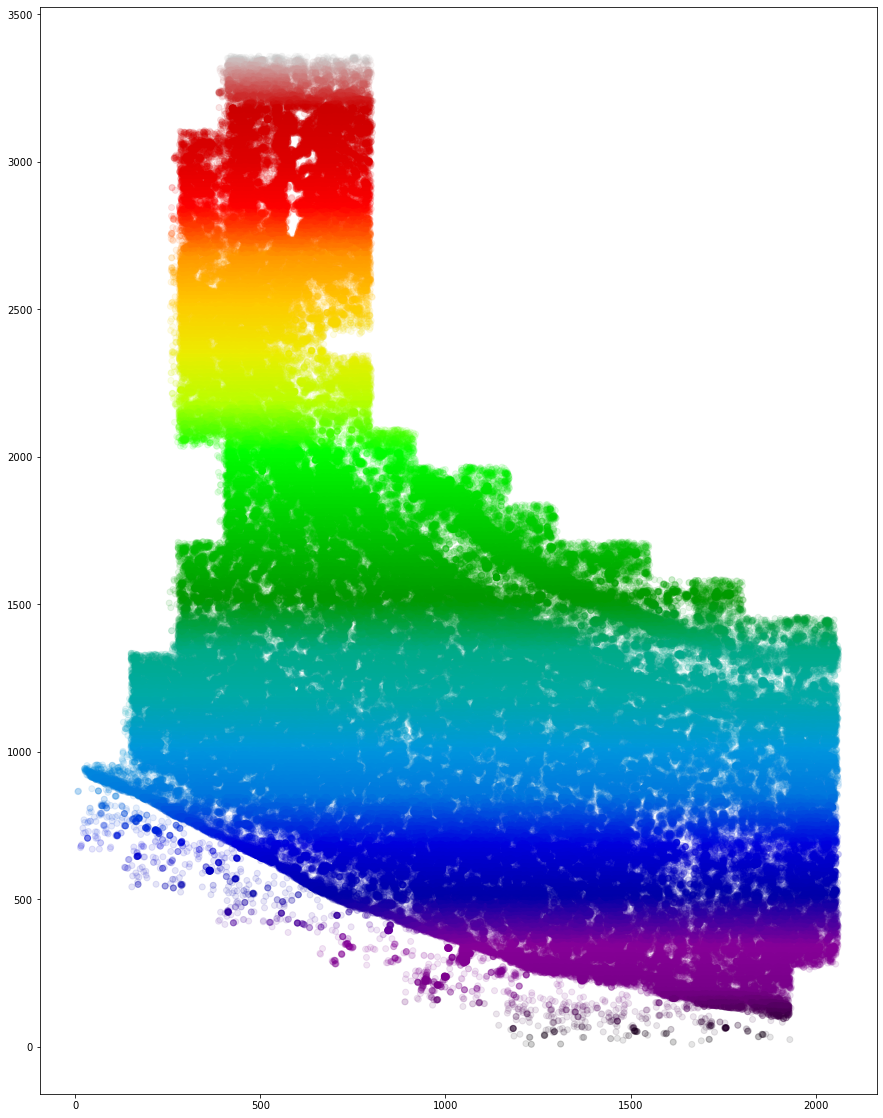

In [7]:
plt.figure(figsize=(15,20))
sdata.scatter(c = sdata.y,cmap="nipy_spectral",alpha=0.1)

In [21]:
sdata.graph.update_knn(n_neighbors=100)
sdata.graph.run_umap(bandwidth=20,n_neighbors=80)
# sdata.graph.run_tsne()


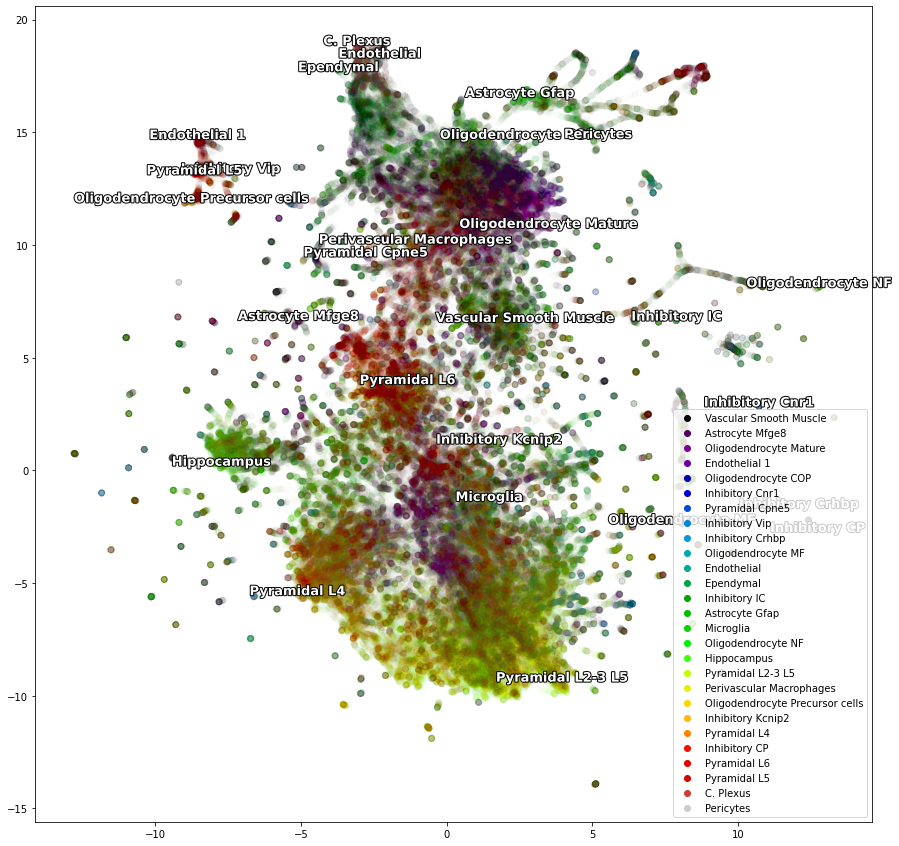

In [26]:
plt.figure(figsize=(15,15))
sdata.graph.plot_umap(color_category='celltype',text_column='celltype', alpha=0.01,cmap="nipy_spectral")

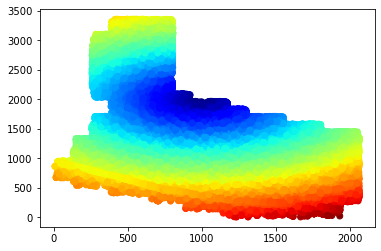

In [24]:
dist_from_center = ((sdata.x-1000)**2+(sdata.y-2000)**2)**0.5

sdata.scatter(c=dist_from_center)

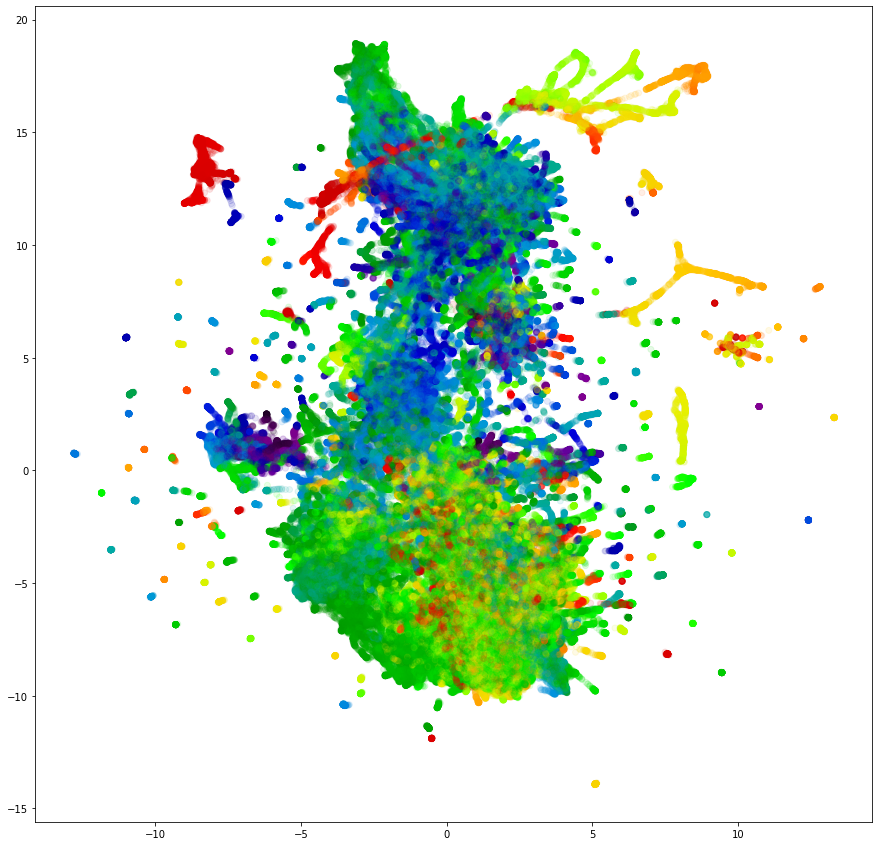

In [25]:
plt.figure(figsize=(15,15))
plt.scatter(*sdata.graph._umap.T, c=dist_from_center, alpha=0.1, cmap='nipy_spectral')

In [12]:
assert False
plt.figure(figsize=(21,21))
sdata.graph.plot_umap(alpha=0.01)

AssertionError: 